In [1]:
import numpy as np
import matplotlib.pyplot as plt


dy/dx = -xy


In [12]:
#solution vs error of fn f, given N
def error_n(f, a=0, b=1, N =100):
    global x
    x = np.linspace(a,b,N)
    
    delx = x[1]-x[0]
    
    #initial conditions
    global Y_euler, Y_RK2
    Y_euler = [1]
    Y_RK2 = [1]
    
    
    for i in range(1,N):
        #Euler
        Y_euler.append(Y_euler[-1]+delx*f(x[i],Y_euler[-1]))
        
        
        #RK2
        k1 = delx*f(x[i], Y_RK2[-1])
        k2 = delx*f(x[i], Y_RK2[-1]+k1)
        Y_RK2.append(Y_RK2[-1]+k1/2+k2/2)
    
    global ys
    ys = np.exp(-(x**2)/2)#analytical soln
    
    return sum(abs(ys - Y_euler))/N, sum(abs(ys-Y_RK2))/N
    
        
    

In [13]:
def func(x,y):
    return -x*y


In [15]:
error = error_n(f=func, a=0,b=1,N=100)
print("Error in Euler:", error[0])
print("Error in RK2:", error[1])

Error in Euler: 0.002291509934915166
Error in RK2: 0.0019788190631306267


Plot

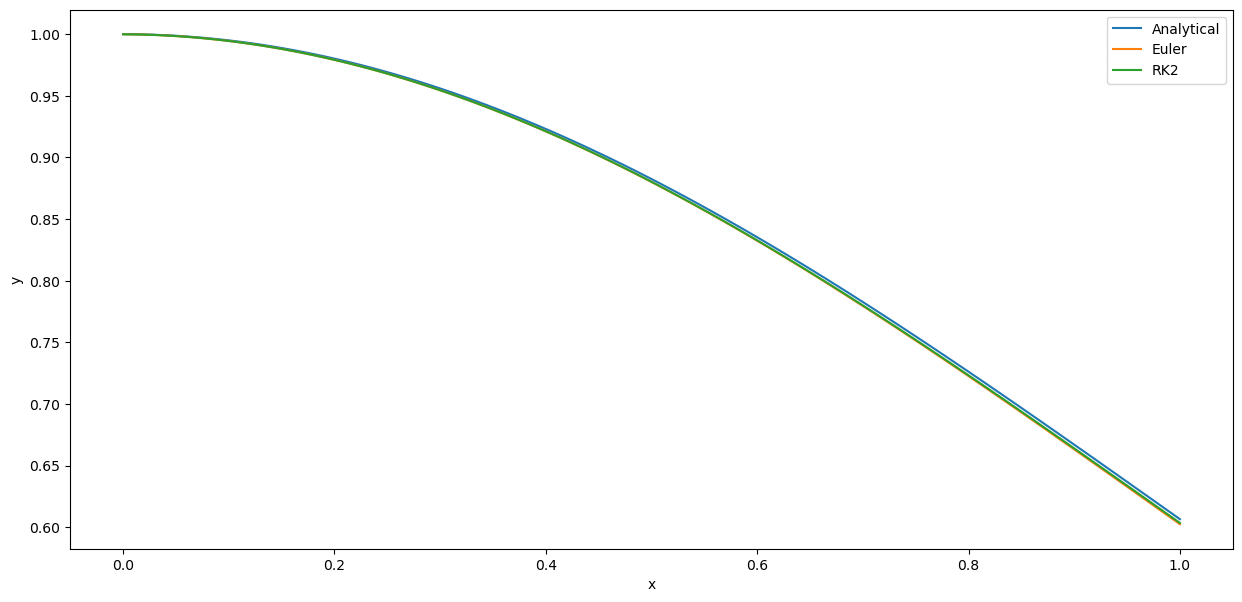

In [16]:
plt.figure(figsize=(15, 7))
plt.plot(x,ys,label='Analytical')
plt.plot(x,Y_euler,label='Euler')
plt.plot(x, Y_RK2, label="RK2")
plt.xlabel("x")
plt.ylabel("y")
plt.legend();